In [1]:
import json
import numpy
from pandas.io.json import json_normalize
from time import time
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as sp
from plotly import figure_factory as ff
from collections import defaultdict

In [2]:
import plotly
from plotly import __version__
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print (__version__ )# requires version >= 1.9.0
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)

2.0.11


In [4]:
plotly.tools.set_credentials_file(username='', api_key='LN0wlExyiDvbkGbWw45H')

In [3]:
df_business = pd.read_csv("yelp_academic_dataset_business.csv",encoding='latin-1') 
df_review=pd.read_csv("yelp_academic_dataset_review.csv",encoding='latin-1') 
df_user=pd.read_csv("yelp_academic_dataset_user.csv",encoding='latin-1') 

In [2]:
df_user=pd.read_csv("yelp_academic_dataset_user.csv",encoding='latin-1') 

In [3]:
len(df_user)

1029432

## Plot user rating star range

In [150]:
df_ratings=pd.read_csv('basic_rating_table_alluser.csv',encoding='latin-1') 

In [152]:
u_ratings=df_ratings.groupby('user_id')['stars'].apply(list)


In [160]:
u_ratings=u_ratings.reset_index()

In [166]:
#include the rating range of each user to the table
mini=[]
maxi=[]
mid=[]
rating_range=[]
for i in range(0,len(u_ratings)):
#     mini.append(min(u_ratings.stars[i]))
#     maxi.append(max(u_ratings.stars[i]))
#     mid.append(np.median(u_ratings.stars[i]))
    rating_range.append(str(u_ratings.rating_min[i])+'-'+str(u_ratings.rating_max[i]))
# u_ratings['rating_min']=mini
# u_ratings['rating_max']=maxi
# u_ratings['rating_median']=mid
# u_ratings['rating_delta']=u_ratings.rating_max-u_ratings.rating_min
u_ratings['rating_range']=rating_range
#u_ratings

In [167]:
plt_rating_range=pd.Series(u_ratings.rating_range.value_counts()).reset_index()

In [188]:
u_ratings['review_count']=u_ratings.stars.apply(lambda x: len(x))

In [190]:
x=u_ratings[u_ratings.rating_range=='1.0-1.0'].review_count
y=u_ratings[u_ratings.rating_range=='2.0-2.0'].review_count
z=u_ratings[u_ratings.rating_range=='3.0-3.0'].review_count
m=u_ratings[u_ratings.rating_range=='4.0-4.0'].review_count
n=u_ratings[u_ratings.rating_range=='5.0-5.0'].review_count

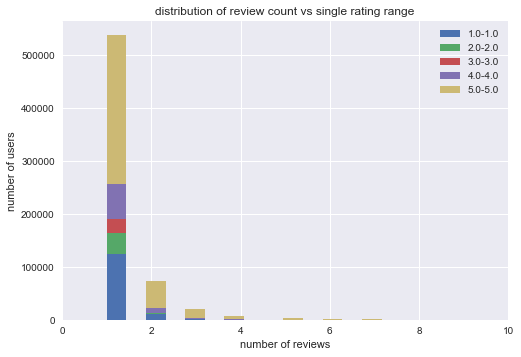

In [208]:
labels=['1.0-1.0','2.0-2.0','3.0-3.0','4.0-4.0','5.0-5.0']
plt.hist([x,y,z,m,n],label=labels,bins=300,stacked=1)
plt.title('distribution of review count vs single rating range')
plt.legend(prop={'size': 10})
plt.xlim([0,10])
plt.xlabel('number of reviews')
plt.ylabel('number of users')

In [ ]:


fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [178]:
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)
len(x)

1000

In [171]:
data = [Bar(x=plt_rating_range['index'],
            y=plt_rating_range.rating_range)]
layout = {'title': 'user rating range '}
fig=Figure(data=data,layout=layout)
iplot(fig)

## 1. Plot yelping since hist

In [43]:
df_user.yelping_since=pd.to_datetime(df_user.yelping_since)

In [44]:
yelp_since=defaultdict(int)
for i in range(0,len(df_user)):
    yelp_since[df_user.yelping_since.iloc[i].year]+=1

In [24]:
#import plotly.plotly as py
#from plotly.graph_objs import *
trace1 = {
  'labels':[str(year) for year in yelp_since.keys()],
    'type':'pie',
  'values':[size for size in yelp_since.values()]
}
data = Data([trace1])
layout = {'title': 'users yelping_since pie chart wroldwide'}
fig = Figure(data=data, layout=layout)
plot_url = iplot(fig)

In [45]:
data = [Bar(x=list(yelp_since.keys()),
            y=list(yelp_since.values()))]
layout = {'title': 'Histogram of years users start using yelp'}
fig=Figure(data=data,layout=layout)
iplot(fig)

## user review count

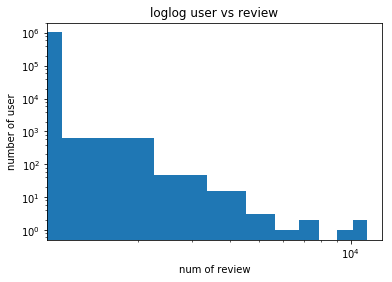

In [52]:
df_user.review_count.plot(kind='hist',loglog=True)
plt.xlabel('num of review')
plt.ylabel('number of user')
plt.title('loglog user vs review')

In [6]:
mu=np.mean(df_user.review_count)
sigma=np.std(df_user.review_count)

In [9]:
sp.norm.fit(df_user.review_count)

(24.31933240855151, 82.066009057406333)

(array([  6.87856022e-01,   1.20012784e-01,   5.35227193e-02,
          3.18486311e-02,   1.89813412e-02,   1.32305971e-02,
          9.89963397e-03,   8.34343599e-03,   5.95571150e-03,
          5.31846688e-03,   4.67539381e-03,   3.62238594e-03,
          3.25713597e-03,   2.86274373e-03,   2.62280559e-03,
          2.17887146e-03,   1.92630499e-03,   1.88744861e-03,
          1.48042804e-03,   1.34831635e-03,   1.25991809e-03,
          1.26768937e-03,   1.10546398e-03,   9.17010546e-04,
          9.75295114e-04,   7.88784495e-04,   7.28557107e-04,
          6.80958043e-04,   7.37299793e-04,   5.90616962e-04,
          5.63417496e-04,   5.37189440e-04,   4.95418833e-04,
          3.90506609e-04,   4.11877618e-04,   4.07020571e-04,
          3.47764593e-04,   3.21536537e-04,   3.66221373e-04,
          2.86565796e-04,   2.58394921e-04,   2.36052503e-04,
          2.48680826e-04,   2.07881628e-04,   2.44795188e-04,
          2.10795856e-04,   1.85539210e-04,   1.77767934e-04,
        

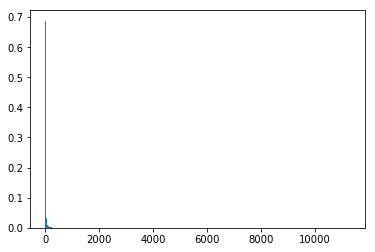

In [48]:
weights = np.ones_like(df_user.review_count)/float(len(df_user.review_count))
plt.hist(df_user.review_count, weights=weights,bins=1000)

(array([   4.,   31.,   88.,  219.,  273.,  226.,  112.,   33.,   10.,    4.]),
 array([-235.8168324 , -179.23269636, -122.64856033,  -66.0644243 ,
          -9.48028826,   47.10384777,  103.6879838 ,  160.27211984,
         216.85625587,  273.4403919 ,  330.02452794]),
 <a list of 10 Patch objects>)

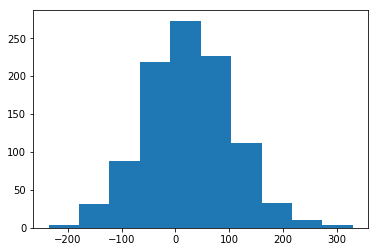

In [71]:
import matplotlib.mlab as mlab
weights = np.ones_like(df_user.review_count)/float(len(df_user.review_count))
#plt.hist(df_user.review_count, weights=weights,bins=1000)
x = np.linspace(xmin, xmax, 100)
#p = mlab.norm_flat(x, mu, sigma)
s = np.random.normal(mu, sigma, 1000)
plt.hist(s)
#plt.xscale('log')
#plt.yscale('log')
# title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
# plt.title(title)

#plt.plot(x,mlab.normpdf(x, mu, sigma))

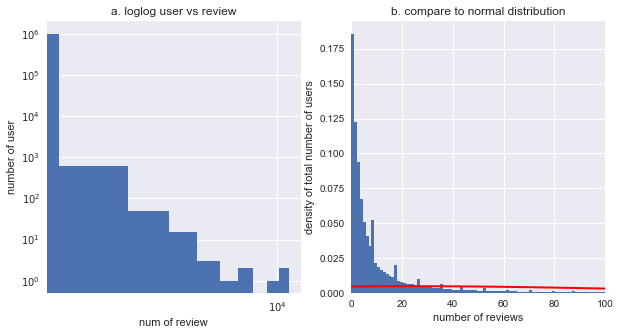

In [111]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
ax2=fig.add_subplot(121)
df_user.review_count.plot(kind='hist',loglog=True)
plt.xlabel('num of review')
plt.ylabel('number of user')
plt.title('a. loglog user vs review')
ax1=fig.add_subplot(122)
weights = np.ones_like(df_user.review_count)/float(len(df_user.review_count))
count, bins, ignored = plt.hist(df_user.review_count, 10000, weights=weights)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('b. compare to normal distribution')
plt.xlim([0,100])
plt.xlabel('number of reviews')
plt.ylabel('density of total number of users')
plt.show()

In [88]:
review_ts_test=df_user.sort('review_count').copy()

/Users/stevezhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [89]:
review_ts_test=review_ts_test.review_count

In [122]:
review_user=review_ts_test
review_biz=df_user.average_stars

In [147]:
mu=np.mean(df_user.average_stars)
std=np.std(df_user.average_stars)
sp.stats.kstest(df_user.average_stars,'norm', args=(mu, std))

KstestResult(statistic=0.11969301034467339, pvalue=0.0)

In [144]:
mu,std

(3.709146684772113, 1.0971766107102798)

In [149]:
mu=np.mean(review_ts_test[review_ts_test<1000])
std=np.std(review_ts_test[review_ts_test<1000])
sp.stats.kstest(review_ts_test,'norm', args=(mu, std))

KstestResult(statistic=0.36334407728509649, pvalue=0.0)

In [141]:
mu=np.mean(review_ts_test)
std=np.std(review_ts_test)
sp.stats.kstest(review_ts_test,'norm', args=(mu, std))

KstestResult(statistic=0.3869933641130362, pvalue=0.0)

In [117]:
!pip install powerlaw

  Running setup.py bdist_wheel for powerlaw ... - \ done
  Stored in directory: /Users/stevezhang/Library/Caches/pip/wheels/0f/3a/65/ef4d039991b4e047000baf4c735e572a90409c31a1772f04d2
Successfully built powerlaw


In [145]:
import powerlaw as p
import seaborn as sns

fig=plt.figure(figsize=(16,8), dpi=1600)
alpha_level=0.65
          
ax3=fig.add_subplot(221)
fit = p.Fit(review_user)
fig4 = fit.plot_ccdf(linewidth = 3,label='User Reviews',color='pink')
fit.power_law.plot_ccdf(ax = fig4, color = 'r', linestyle = '--',label='Powerlaw')
plt.title('CCDF of User Reviews and Power Law Fit ')
plt.legend()
#fit.lognormal.plot_ccdf(ax = fig4, color = 'g', linestyle ='--')

ax4=fig.add_subplot(222)
fit2 = p.Fit(review_biz)
fit2.distribution_compare('power_law', 'lognormal')


fig4 = fit2.plot_ccdf(linewidth = 3,label='User Rating',color = 'lightblue')
fit2.power_law.plot_ccdf(ax = fig4, color = 'r', linestyle = '--',label='Powerlaw')
plt.title('CCDF of User Rating and Power Law Fit ')
plt.legend()

import numpy as np
import seaborn as sns

fig=plt.figure(figsize=(16,8), dpi=1600)
alpha_level=0.65

ax1=fig.add_subplot(223)

data_size=len(review_ts_test[review_ts_test<1000])
data_set=sorted(set(review_ts_test[review_ts_test<1000]))
bins=np.append(data_set, data_set[-1]+1)

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(review_ts_test[review_ts_test<1000], bins=bins, density=False)

counts=counts.astype(float)/data_size
cdf = np.cumsum(counts)

####
mu = np.mean(review_ts_test[review_ts_test<1000])
sigma = np.std(review_ts_test[review_ts_test<1000])
s = np.random.normal(mu, sigma, len(review_ts_test[review_ts_test<1000]))

data_size1=len(s)
data_set1=sorted(set(s))
bins1=np.append(data_set1, data_set1[-1]+1)

# Use the histogram function to bin the data
counts1, bin_edges1 = np.histogram(s, bins=bins1, density=False)

counts1=counts1.astype(float)/data_size1
cdf1 = np.cumsum(counts1)

####
plt.loglog(bin_edges[0:-1], 1-cdf,linestyle='-.', color='red',label='User Reviews')
plt.loglog(bin_edges1[0:-1], 1-cdf1,linestyle='--', color='blue',label='Normal Distroibution')
####
plt.xlim([1,10**4])
plt.legend()
plt.title('ccdf of user reviews and normal distribution')

##
ax1=fig.add_subplot(224)

data_size=len(review_biz)
data_set=sorted(set(review_biz))
bins=np.append(data_set, data_set[-1]+1)

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(review_biz, bins=bins, density=False)

counts=counts.astype(float)/data_size
cdf = np.cumsum(counts)

####
mu = np.mean(review_biz)
sigma = np.std(review_biz)
s = np.random.normal(mu, sigma, len(review_biz))

data_size1=len(s)
data_set1=sorted(set(s))
bins1=np.append(data_set1, data_set1[-1]+1)

# Use the histogram function to bin the data
counts1, bin_edges1 = np.histogram(s, bins=bins1, density=False)

counts1=counts1.astype(float)/data_size1
cdf1 = np.cumsum(counts1)

####
plt.plot(bin_edges[0:-1], 1-cdf, color='Green',label='user rating')
plt.plot(bin_edges1[0:-1], 1-cdf1, color='blue',label='Normal Distroibution')
####
plt.xlim([0,6])
plt.legend()
plt.title('ccdf of user rating and normal distribution')


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/stevezhang/anaconda/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning:

invalid value encountered in true_divide

Calculating best minimal value for power law fit


In [97]:
review_stats=review_ts_test.describe().reset_index()

In [100]:
stars_stats=df_user.average_stars.describe().reset_index()

index  average_stars
0  count   1.029432e+06
1   mean   3.709147e+00
2    std   1.097177e+00
3    min   1.000000e+00
4    25%   3.130000e+00
5    50%   3.880000e+00
6    75%   4.550000e+00
7    max   5.000000e+00

In [99]:
pd.merge(left=review_stats,right=stars_stats,on='index',how='left')

index  review_count  average_stars
0  count  1.029432e+06   1.029432e+06
1   mean  2.431933e+01   3.709147e+00
2    std  8.206605e+01   1.097177e+00
3    min  0.000000e+00   1.000000e+00
4    25%  2.000000e+00   3.130000e+00
5    50%  5.000000e+00   3.880000e+00
6    75%  1.600000e+01   4.550000e+00
7    max  1.128400e+04   5.000000e+00

## 2. elite and non-elite

In [9]:
df_user.loc[df_user['elite'] != "['None']", 'elite'] = 1
df_user=df_user.replace("['None']",0)

### 1. ratio(ratio)

### 2. compare elite and non-elite review_count mean and variance

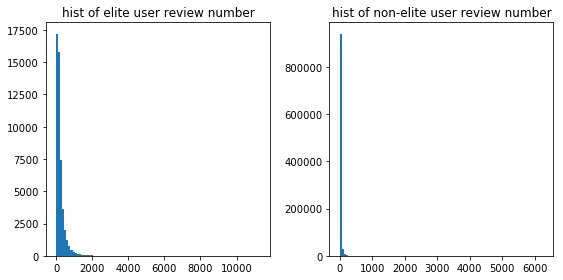

In [14]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
plt.hist(df_user[df_user.elite==1].review_count,bins=100)
plt.title('hist of elite user review number')
ax2=fig.add_subplot(122)
plt.hist(df_user[df_user.elite==0].review_count,bins=100)
plt.title('hist of non-elite user review number')
plt.tight_layout()

In [17]:
np.var(df_user[df_user.elite==1].review_count),np.var(df_user[df_user.elite==0].review_count)

(72348.410514979, 1055.859606923425)

In [15]:
sp.levene(df_user[df_user.elite==1].review_count,df_user[df_user.elite==0].review_count)

LeveneResult(statistic=215327.40102879831, pvalue=0.0)

## 3. take one or four businesses, plot individual ratings and average ratings trend by time, see ‘ndividual ratings and average ratings trend ‘ as an example


In [26]:
df_rating.date=pd.to_datetime(df_rating.date)

business_id  review_count
0       0DI8Dt2PJp07XkVvIElIcQ            17
1       LTlCaCGZE14GuaUXUGbamg             9
2       EDqCEAGXVGCH4FJXgqtjqg             7
3       cnGIivYRLxpF7tBVR_JwWA             4
4       cdk-qqJ71q6P7TJTww_DSA             8
5       Q9rsaUiQ-A3NdEAloy0aJA             3
6       Cu4_Fheh7IrzGiK-Pc79ig             8
7       GDnbt3isfhd57T1QqU6flg             9
8       qwAHit4Tuj1zpO7CxVwOMA            11
9       Nbr0kbtIrVlEcKIZoXWbSw             3
10      MFneYHieJ_lnjMeFUGKVbw             7
11      42romV8altAeuZuP2OC1gw            38
12      iaunX_af5M5lfT2eEm9FMQ             4
13      Tc24GX9-ZPr4_SHU0nJZZA             4
14      6EvETd9FVPJfhT_6AW9iEw             3
15      DSWsjtAfLYw9a4MTz0kKLw             3
16      SbfEPi-iR4ntf3wRQfxYyw            17
17      YCsLfBVdLFeN2Necw1HPSA             5
18      O_4OTnw48ULP5uZh6MqiOQ            14
19      CE0dABv9sfrXjDIJugpU8A             7
20      QQLW9IESGVMZR4lr09wNJg             3
21      DNyYOxVAfu0oUcPNL1ljCQ             7
22      0s03ippU5tXAxVV9ImjQvw             3
23      a1Ba6XeIOP48e64YFD0dMw             3
24      GVT9RQMCqPiHw231ncehFw             6
25      826djy6K_9Fp0ptqJ2_Yag            68
26      AGN788ObhwXu7rb8MEejIA             4
27      lHYMeXf8JH1Q8Dazn9s3Gg            18
28      sY_hAfwWzgr0sxyMgMB5Jg             7
29      Mi5uhdFB9OJteXPd0_IKfw           119
...                        ...           ...
144042  J1RDyyPxhioqm8c_fi4P4Q           802
144043  K49rGkhARrziyBjcBfxmbQ            17
144044  0kOFaly9TuwsAQzHrURI4Q            17
144045  3vISB7bi2mIOW_gMeXdLFA             5
144046  sK7rtisiunvVQcq_FpHrsw             3
144047  bWhdMTPHrxFqs9WJ79kgSw             7
144048  _BJ2lBc1TWwIfxNzXbaaBA             5
144049  9b-aJpz-NR_nGObB3-ZZ3w            36
144050  F6bW8SY1acilWdAp3ilRIw            13
144051  9SPbig4MnnbFtc6HLuY6mA            34
144052  YiRWQOav8cmE7_1qWCwJIw            12
144053  C_chktl5jFeRqu1C0rmScA            19
144054  xowy4YxBXXGOYuajsxjwkA            50
144055  8Guc1oR4Ha-DmNjJhr2Cfw            10
144056  g9gAuOEXBbWnLlu2uOftwA            80
144057  -McKyjNSqS1h9dDJH3dyUA            13
144058  NhCc16EzL8LyR5va_pwfSA             4
144059  efFhZsUguEV2I02AJs-shw            14
144060  pz58I0Oxugx4s3FKwyDQaQ            15
144061  eHLUQ2W_hXx61NmiL9kSVg            60
144062  SWkmyhQBV1A7Qu4LRHoVXQ             8
144063  J6XocDoy5URKc7objrrefA            13
144064  OgwN65jZebPRIPSmNpRP7A            55
144065  umBsUDjSPzF28LOw-U_NfA            84
144066  F7hFI5rMzAGJk_WHSmX24w            54
144067  L7_i8iPFR8ozgqSsKJ9W6w             6
144068  4C5QEYifK4bJASAJHvnHeQ             5
144069  5GslSGCDT3gXei0kKR-P3g            12
144070  z0GwhlBflcCnVdACU9tQxQ            19
144071  a048R60CLFeObJ3mhHdPRg             5

[144072 rows x 2 columns]

(array([  97.,    0.,  201.,    0.,    0.,  408.,    0.,  870.,    0.,  737.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

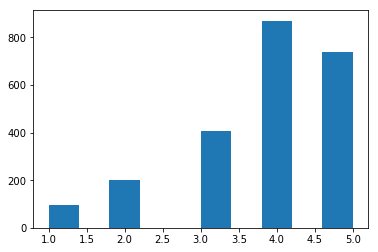

In [25]:
x=df_rating[df_rating.business_id=='42romV8altAeuZuP2OC1gw'].date
y=df_rating[df_rating.business_id=='42romV8altAeuZuP2OC1gw'].stars
y1=df_rating[df_rating.business_id=='42romV8altAeuZuP2OC1gw'].cum_rating

# Correlations among variables

## 1. correlations among contineous variables

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
def vif_cal(data):
    f_tag_user1.ix[:, df_tag_user1.columns != 'user_class']

In [81]:
df=df_user[['useful','fans','review_count','compliment_cool','average_stars']]

In [82]:
df

useful  fans  review_count  compliment_cool  average_stars
0         18456   298           761             4192           3.59
1           117    34            80              144           4.29
2            58    48           841               36           4.15
3            42    28           376               54           3.82
4             8     2            28                0           2.97
5             5     9           194               19           3.76
6            18     4           111               33           4.04
7            89    21           260               18           3.73
8            23     1            30                0           3.42
9            29     3            96                7           3.39
10            3     7            70                2           3.92
11           27     4            83                0           3.92
12           11     0            14                0           4.21
13           23     3            75                1           3.83
14            9    12           141              120           4.31
15           73    46           944               58           3.63
16            2     0            24                0           4.08
17          135     0           106                1           3.53
18          397     7             3               15           4.00
19            0     0            11                0           4.91
20            9     7            30                2           4.42
21         7666    58           623              119           3.56
22           12     3            49                0           3.82
23           61     4           125                2           4.20
24          146    12           568                5           3.65
25           37    13           100               22           3.69
26          564    41           466               73           4.16
27            3     5            35                0           4.00
28            9    17           128               22           3.62
29          565    53           591              251           3.23
...         ...   ...           ...              ...            ...
1029402       0     0             1                0           5.00
1029403       0     0             1                0           5.00
1029404       0     0             1                0           5.00
1029405       0     0             7                0           3.11
1029406       0     0             1                0           1.00
1029407       0     0             6                0           4.33
1029408       0     0             1                0           3.00
1029409       0     0             2                0           2.50
1029410       0     0             2                0           1.00
1029411       0     0             4                0           3.25
1029412       1     0             1                0           1.00
1029413       0     0             3                0           3.33
1029414       1     0             5                0           1.60
1029415       0     0             5                0           3.00
1029416       1     0             1                0           4.00
1029417       0     0             9                0           2.33
1029418       0     0             2                0           2.50
1029419       0     0             1                0           5.00
1029420       0     0             9                1           2.00
1029421       0     0             5                0           3.40
1029422       0     0             1                0           5.00
1029423       0     0             1                0           1.00
1029424       0     0             1                0           5.00
1029425      12     0            14                0           3.27
1029426       0     0             1                0           5.00
1029427       0     0             1                0           5.00
1029428       1     0             1                0           5.

In [83]:
df=df[:1000]

In [84]:
features = "+".join(df[['useful','fans','review_count','compliment_cool']].columns)

In [76]:
features

'useful+fans+review_count+funny+compliment_cool'

In [85]:
y, X = dmatrices('average_stars ~' + features, df, return_type='dataframe')

In [86]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [87]:
vif

VIF Factor         features
0    1.218082        Intercept
1    2.792697           useful
2    2.231227             fans
3    1.776759     review_count
4    3.115006  compliment_cool

In [79]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

In [ ]:
lr1.fit(df_user[["review_count"]+["fans"]+["average_stars"]+["useful"]], final_exam[["Final_exam_marks"]])

In [ ]:
y, X = dmatrices('average ~' + features, df, return_type='dataframe')